### Get Data

In [62]:
import pandas as pd 
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE, Isomap, MDS
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [4]:
satr = pd.read_fwf('./samsung_har/samsung_train.txt', header=None)
sats = pd.read_fwf('./samsung_har/samsung_test.txt', header=None)

assert satr.shape[1] == sats.shape[1]

In [7]:
satrl = pd.read_fwf('./samsung_har/samsung_train_labels.txt', header=None)
satsl = pd.read_fwf('./samsung_har/samsung_test_labels.txt', header=None)

In [10]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

%matplotlib inline
%config InlineBackend.figure_format="retina"

RANDOM_STATE = 42

In [11]:
X = pd.concat([satr, sats], axis=0)
y = pd.concat([satrl, satsl], axis=0)

assert X.shape[0] == (satr.shape[0] + sats.shape[0])
assert y.shape[0] == (satrl.shape[0] + satsl.shape[0])
assert X.shape[0] == y.shape[0]

In [12]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

In [15]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled, columns=scaler.get_feature_names_out())
X_scaled

x0        x1        x2        x3        x4        x5        x6  \
0      0.209466 -0.068703 -0.452195 -0.883335 -0.945431 -0.744387 -0.874687   
1      0.054081  0.035902 -0.275222 -0.890098 -0.929817 -0.860322 -0.883627   
2      0.072947 -0.046427 -0.085548 -0.883565 -0.913598 -0.906457 -0.878093   
3      0.065623 -0.227794 -0.270741 -0.885188 -0.946015 -0.935521 -0.879495   
4      0.026719  0.031617 -0.121380 -0.889855 -0.940846 -0.935041 -0.882451   
...         ...       ...       ...       ...       ...       ...       ...   
10294  0.539172 -0.960174  0.185107  0.729285  0.738886  0.985976  0.671427   
10295  1.352809 -0.578309  0.056759  0.689343  1.076214  1.032342  0.629191   
10296  1.147702  1.288059 -0.129415  0.634062  0.935694  0.899035  0.594164   
10297 -0.569941  0.975327  0.234320  0.648934  0.560590  1.004592  0.583607   
10298 -1.853396 -0.018666 -0.529760  0.633133  0.629605  1.111706  0.490231   

             x7        x8        x9  ...      x551      x552      x553  \
0     -0.944877 -0.773250 -0.868773  ... -0.819093 -0.000264 -0.299902   
1     -0.927796 -0.858859 -0.884263  ...  0.127803 -0.925905 -0.789555   
2     -0.904569 -0.908437 -0.876139  ...  1.172610 -0.287824 -0.461181   
3     -0.943980 -0.938095 -0.876139  ...  1.132149  0.566244  0.436736   
4     -0.937622 -0.940948 -0.883152  ... -0.158720 -0.165153 -0.263958   
...         ...       ...       ...  ...       ...       ...       ...   
10294  0.778479  0.959693  1.210539  ... -0.212834 -0.242630 -0.431080   
10295  1.023717  0.864009  1.210539  ... -0.101244 -0.068167 -0.267420   
10296  0.810529  0.671554  0.880306  ... -0.786194  0.561361  0.487469   
10297  0.508257  0.815788  0.880306  ... -0.705592  0.290917 -0.000118   
10298  0.634896  0.965017  0.659399  ... -0.558583  0.706954  0.585400   

           x554      x555      x556      x557      x558      x559      x560  
0     -0.357898  0.062039 -0.782988 -0.019034 -0.674432  0.382008 -0.016151  
1      0.135993 -0.022538 -1.217721  1.470315 -0.681360  0.383148 -0.000121  
2     -0.375145  0.391762  0.134732  1.686961 -0.689471  0.384289  0.019214  
3     -0.132194 -0.034739  1.010013 -0.982261 -0.688915  0.388536  0.024624  
4      0.343504  0.268015  1.096950 -1.251689 -0.687381  0.399066  0.038649  
...         ...       ...       ...       ...       ...       ...       ...  
10294 -1.025409  0.768198  1.407463 -1.422736 -0.303659  0.691994  0.889111  
10295 -2.211711 -0.839484 -1.095665  0.684415 -0.310406  0.688561  0.880288  
10296 -0.562328  0.192082  1.101957  0.768150 -0.310750  0.691509  0.875719  
10297  1.297936 -1.837152  1.479507  0.001693 -0.319284  0.659762  0.899444  
10298  1.756231 -0.649611  1.393061 -0.032483 -0.319991  0.656994  0.901454  

[10299 rows x 561 columns]

In [23]:
pca = PCA(random_state=RANDOM_STATE)
pca.fit(X_scaled)

cum_var = np.cumsum(pca.explained_variance_ratio_)
cum_var

array([0.5073001 , 0.56968572, 0.59657427, 0.62085832, 0.63991164,
       0.65617006, 0.67022607, 0.68238653, 0.6922126 , 0.70170707,
       0.7101991 , 0.71828539, 0.7259139 , 0.73268104, 0.73896051,
       0.74511202, 0.75105072, 0.75679129, 0.76241073, 0.76780791,
       0.77299879, 0.77802213, 0.78273453, 0.78737234, 0.79182417,
       0.79622995, 0.80038737, 0.80437443, 0.80826689, 0.81207284,
       0.81573508, 0.81937333, 0.8228721 , 0.82630198, 0.8296664 ,
       0.8329664 , 0.83619431, 0.83918661, 0.84212742, 0.84499974,
       0.84775227, 0.85046736, 0.85312049, 0.85569533, 0.85824478,
       0.86071522, 0.86316613, 0.86554803, 0.86787981, 0.87020439,
       0.87248335, 0.8746887 , 0.87681811, 0.8789036 , 0.88094269,
       0.88295209, 0.88493173, 0.88686913, 0.88879769, 0.89069233,
       0.89255764, 0.89438748, 0.89619274, 0.89795712, 0.89970228,
       0.90141633, 0.90312545, 0.90479738, 0.90643109, 0.90804209,
       0.90964518, 0.91120575, 0.91271036, 0.91420586, 0.91569

In [24]:
comps = np.argmax(cum_var >= 0.9) + 1
comps

np.int64(66)

In [25]:
X_pca = PCA(n_components=comps, random_state=RANDOM_STATE)
X_pca_t = X_pca.fit_transform(X_scaled)

In [26]:
X_pca_t = pd.DataFrame(X_pca_t)
X_pca_t

0         1         2         3         4         5         6   \
0     -16.392383  1.979406 -3.441469 -0.413249 -7.731943 -2.747408 -2.537708   
1     -15.593296  1.175288  0.449853  2.815823 -4.718422 -1.585128  0.183193   
2     -15.436910  2.246063  1.427240  4.013312 -4.364919 -1.016467 -0.003762   
3     -15.662168  3.772916  1.424843  2.806675 -3.211413 -0.739033 -0.443238   
4     -15.857151  4.450223  1.968235  3.134336 -3.325551 -0.907280  0.768012   
...          ...       ...       ...       ...       ...       ...       ...   
10294  10.151181 -6.464347  1.137256  2.786745  3.381097  1.956469 -0.923529   
10295  12.123411 -4.851337  0.717962  2.386974  2.144480 -0.100047 -0.827767   
10296  11.831657 -3.393912 -2.179470  2.092656  0.430165  0.493477 -1.401603   
10297   8.187779 -4.359549 -1.204251  3.215152  1.236007  0.940794 -2.512994   
10298   9.293742 -3.957258 -1.721276  4.748371  3.456627  1.203155 -3.521852   

             7         8         9   ...        56        57        58  \
0     -5.304867  1.268852 -3.750055  ... -0.735519 -2.248698 -0.339002   
1     -1.636648 -0.023448  0.036998  ... -1.411259 -0.382922  0.083889   
2     -1.279425 -0.207414 -0.845258  ... -0.019315 -0.788402 -0.946968   
3     -1.735124 -0.940952 -1.646157  ...  1.587536 -0.698254 -0.580982   
4     -0.082641 -0.522024  0.933564  ... -0.109564  0.495864 -0.739547   
...         ...       ...       ...  ...       ...       ...       ...   
10294  3.770992  0.539673  0.182149  ... -1.091945 -0.995937  0.169998   
10295  1.692934  1.288151  1.457054  ... -1.594722 -0.196100 -0.056383   
10296  0.136659  1.159906 -0.535795  ... -0.931651  0.808443  1.408492   
10297  1.182126  1.530451 -0.595035  ...  1.247032  1.543570  1.157786   
10298  0.590950  0.580589 -3.081623  ...  0.856065  0.010725  0.760218   

             59        60        61        62        63        64        65  
0     -0.986962  0.961519 -0.484005 -0.382308 -0.083518 -1.998296  2.903006  
1      0.379513  0.531182 -0.328179 -0.221963  0.060481 -0.714649  0.731923  
2      0.059530 -0.095555 -0.156681  1.473559  1.158386  0.055018  0.412835  
3      1.162428  0.921976  0.062957  2.251950 -0.496854  4.279086 -1.078543  
4      0.624986 -0.333162  0.398742  0.522058  0.735889 -0.262527  0.535776  
...         ...       ...       ...       ...       ...       ...       ...  
10294  0.221168 -1.265014 -0.491491  0.110080  0.239323 -1.070092 -1.627483  
10295  0.132510 -1.494762 -0.904231 -0.266224 -0.882542 -0.987473 -1.327772  
10296 -2.670332  1.937112 -3.730320  0.395929  0.243080 -2.340547 -4.298753  
10297  0.419267 -1.157217 -0.827452 -0.213151  1.322705 -0.170200 -0.220920  
10298 -0.269114  0.957871 -1.487703 -0.425765  2.033172 -0.529102 -1.160777  

[10299 rows x 66 columns]

## Проекция после PCA на два первых компонента

In [32]:
%%time
n_clusters = 6
km = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE, n_init=100)
clusts = km.fit_predict(X_pca_t)
clusts

CPU times: user 3min 24s, sys: 686 ms, total: 3min 24s
Wall time: 9.29 s


array([1, 1, 1, ..., 0, 0, 0], shape=(10299,), dtype=int32)

CPU times: user 8.76 ms, sys: 995 μs, total: 9.76 ms
Wall time: 9.09 ms


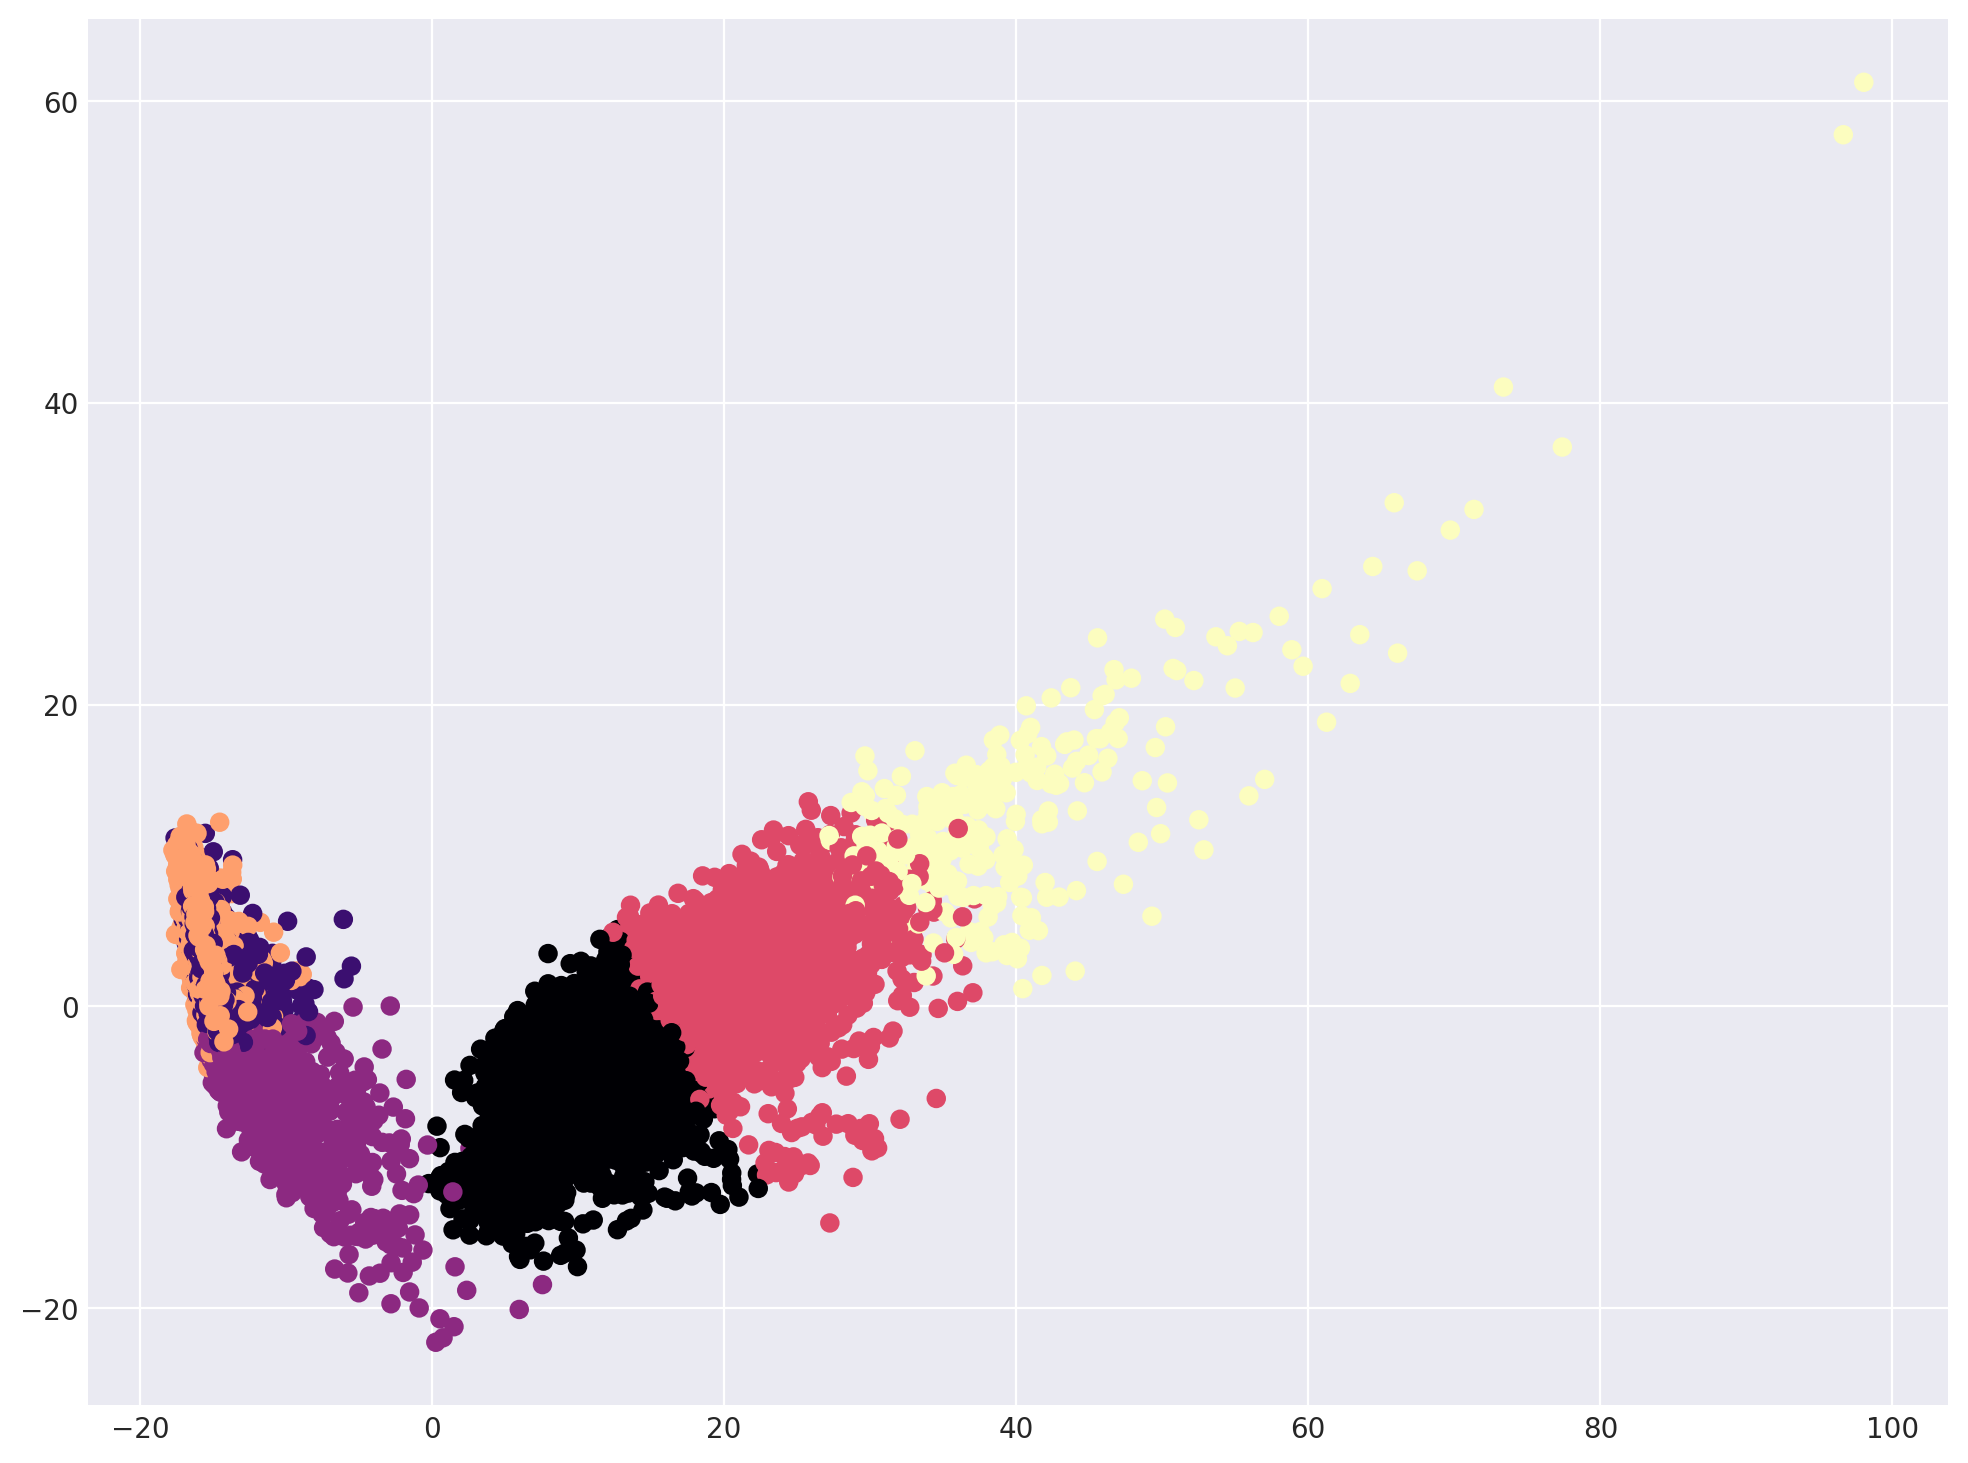

In [33]:
%%time
plt.scatter(X_pca_t.iloc[:, 0], X_pca_t.iloc[:, 1], cmap='magma', c=clusts)

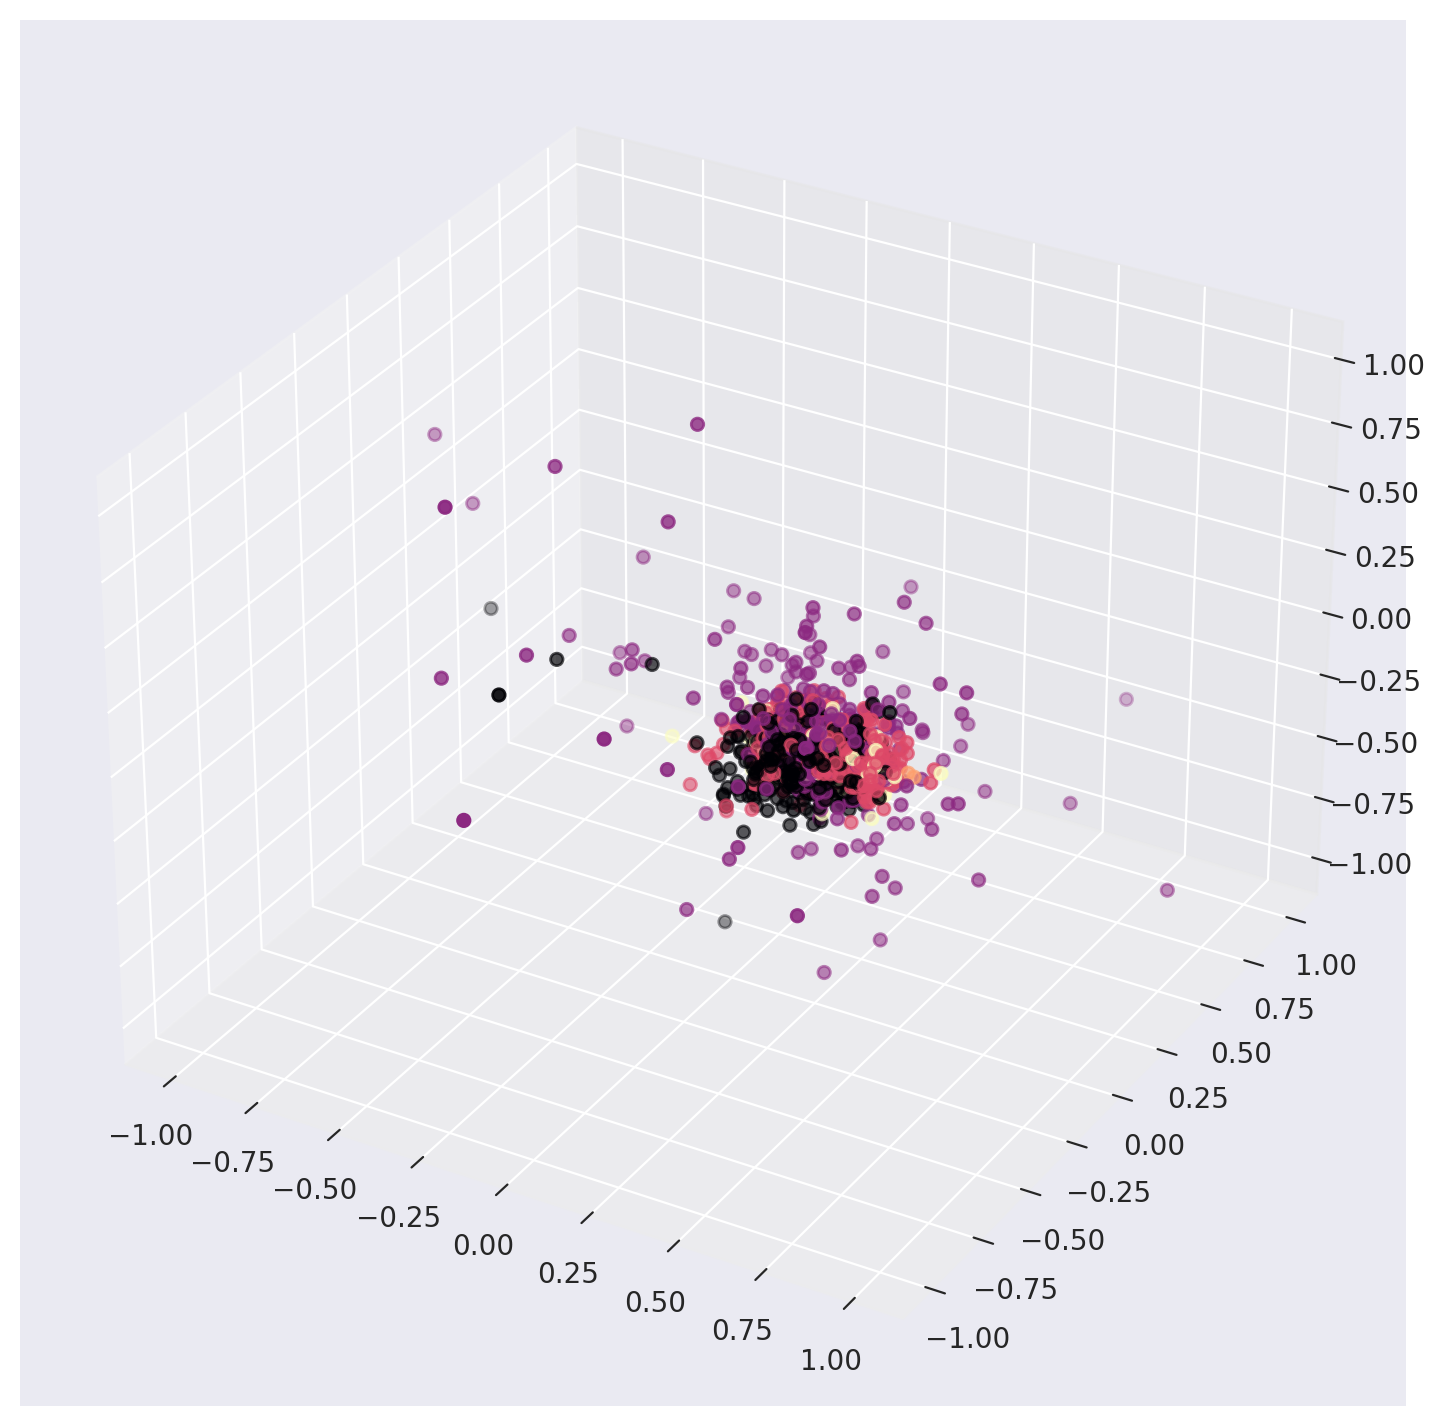

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_vals = X.iloc[:, 0]
y_vals = X.iloc[:, 1]
z_vals = X.iloc[:, 2]
ax.scatter(x_vals, y_vals, z_vals, cmap='magma', c=clusts)

`Трёхмерный вариант на три первые компоненты толку не дал`

#### Davis Bouldin score

In [39]:
dbs = davies_bouldin_score(X_pca_t, clusts)
dbs

np.float64(2.0575797882902878)

#### Silhoutte score

In [41]:
silhouette = silhouette_score(X_pca_t, clusts)
silhouette

np.float64(0.1407309503699858)

In [ ]:
%%time
agc = AgglomerativeClustering(n_clusters=6)
agc_clusts = agc.fit_predict(X_pca_t)

CPU times: user 2.47 s, sys: 234 ms, total: 2.7 s
Wall time: 2.7 s


CPU times: user 6.5 ms, sys: 8 μs, total: 6.51 ms
Wall time: 6.05 ms


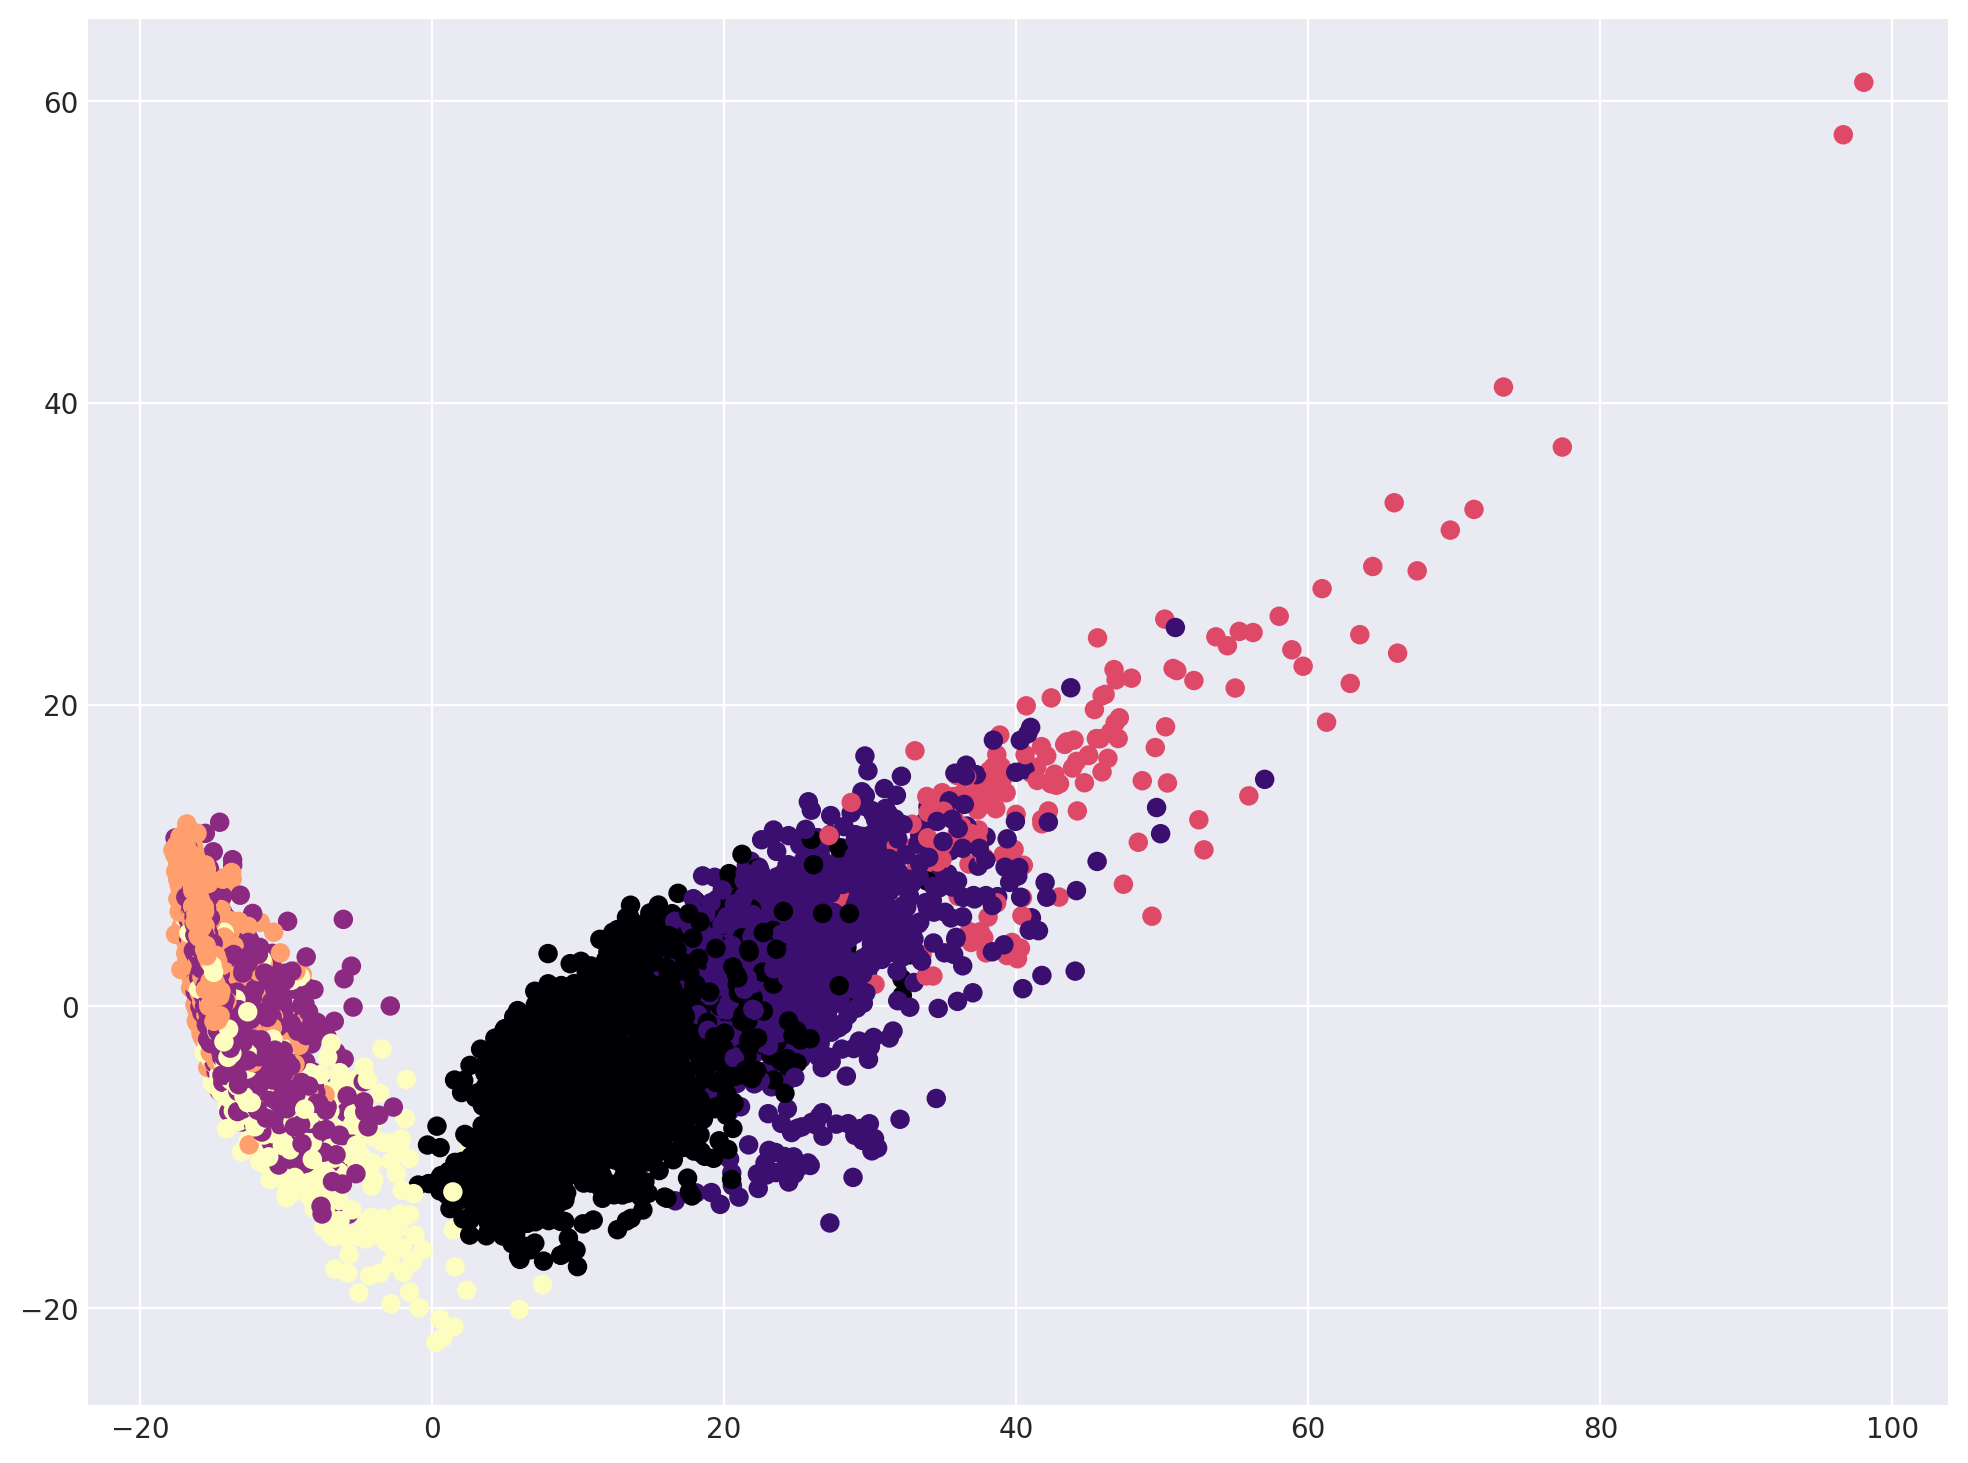

In [45]:
%%time
plt.scatter(X_pca_t.iloc[:, 0], X_pca_t.iloc[:, 1], cmap='magma', c=agc_clusts)

In [46]:
dbs = davies_bouldin_score(X_pca_t, agc_clusts)
dbs

np.float64(2.123024693432385)

In [47]:
silhouette = silhouette_score(X_pca_t, agc_clusts)
silhouette

np.float64(0.1507902884195069)

## MDS

In [64]:
%%time

mds = MDS(n_components=2, n_jobs=-1)

mds_res = mds.fit_transform(X_pca_t)

CPU times: user 8.55 s, sys: 5.04 s, total: 13.6 s
Wall time: 19min 45s


In [ ]:
mds_res = pd.DataFrame(mds_res)

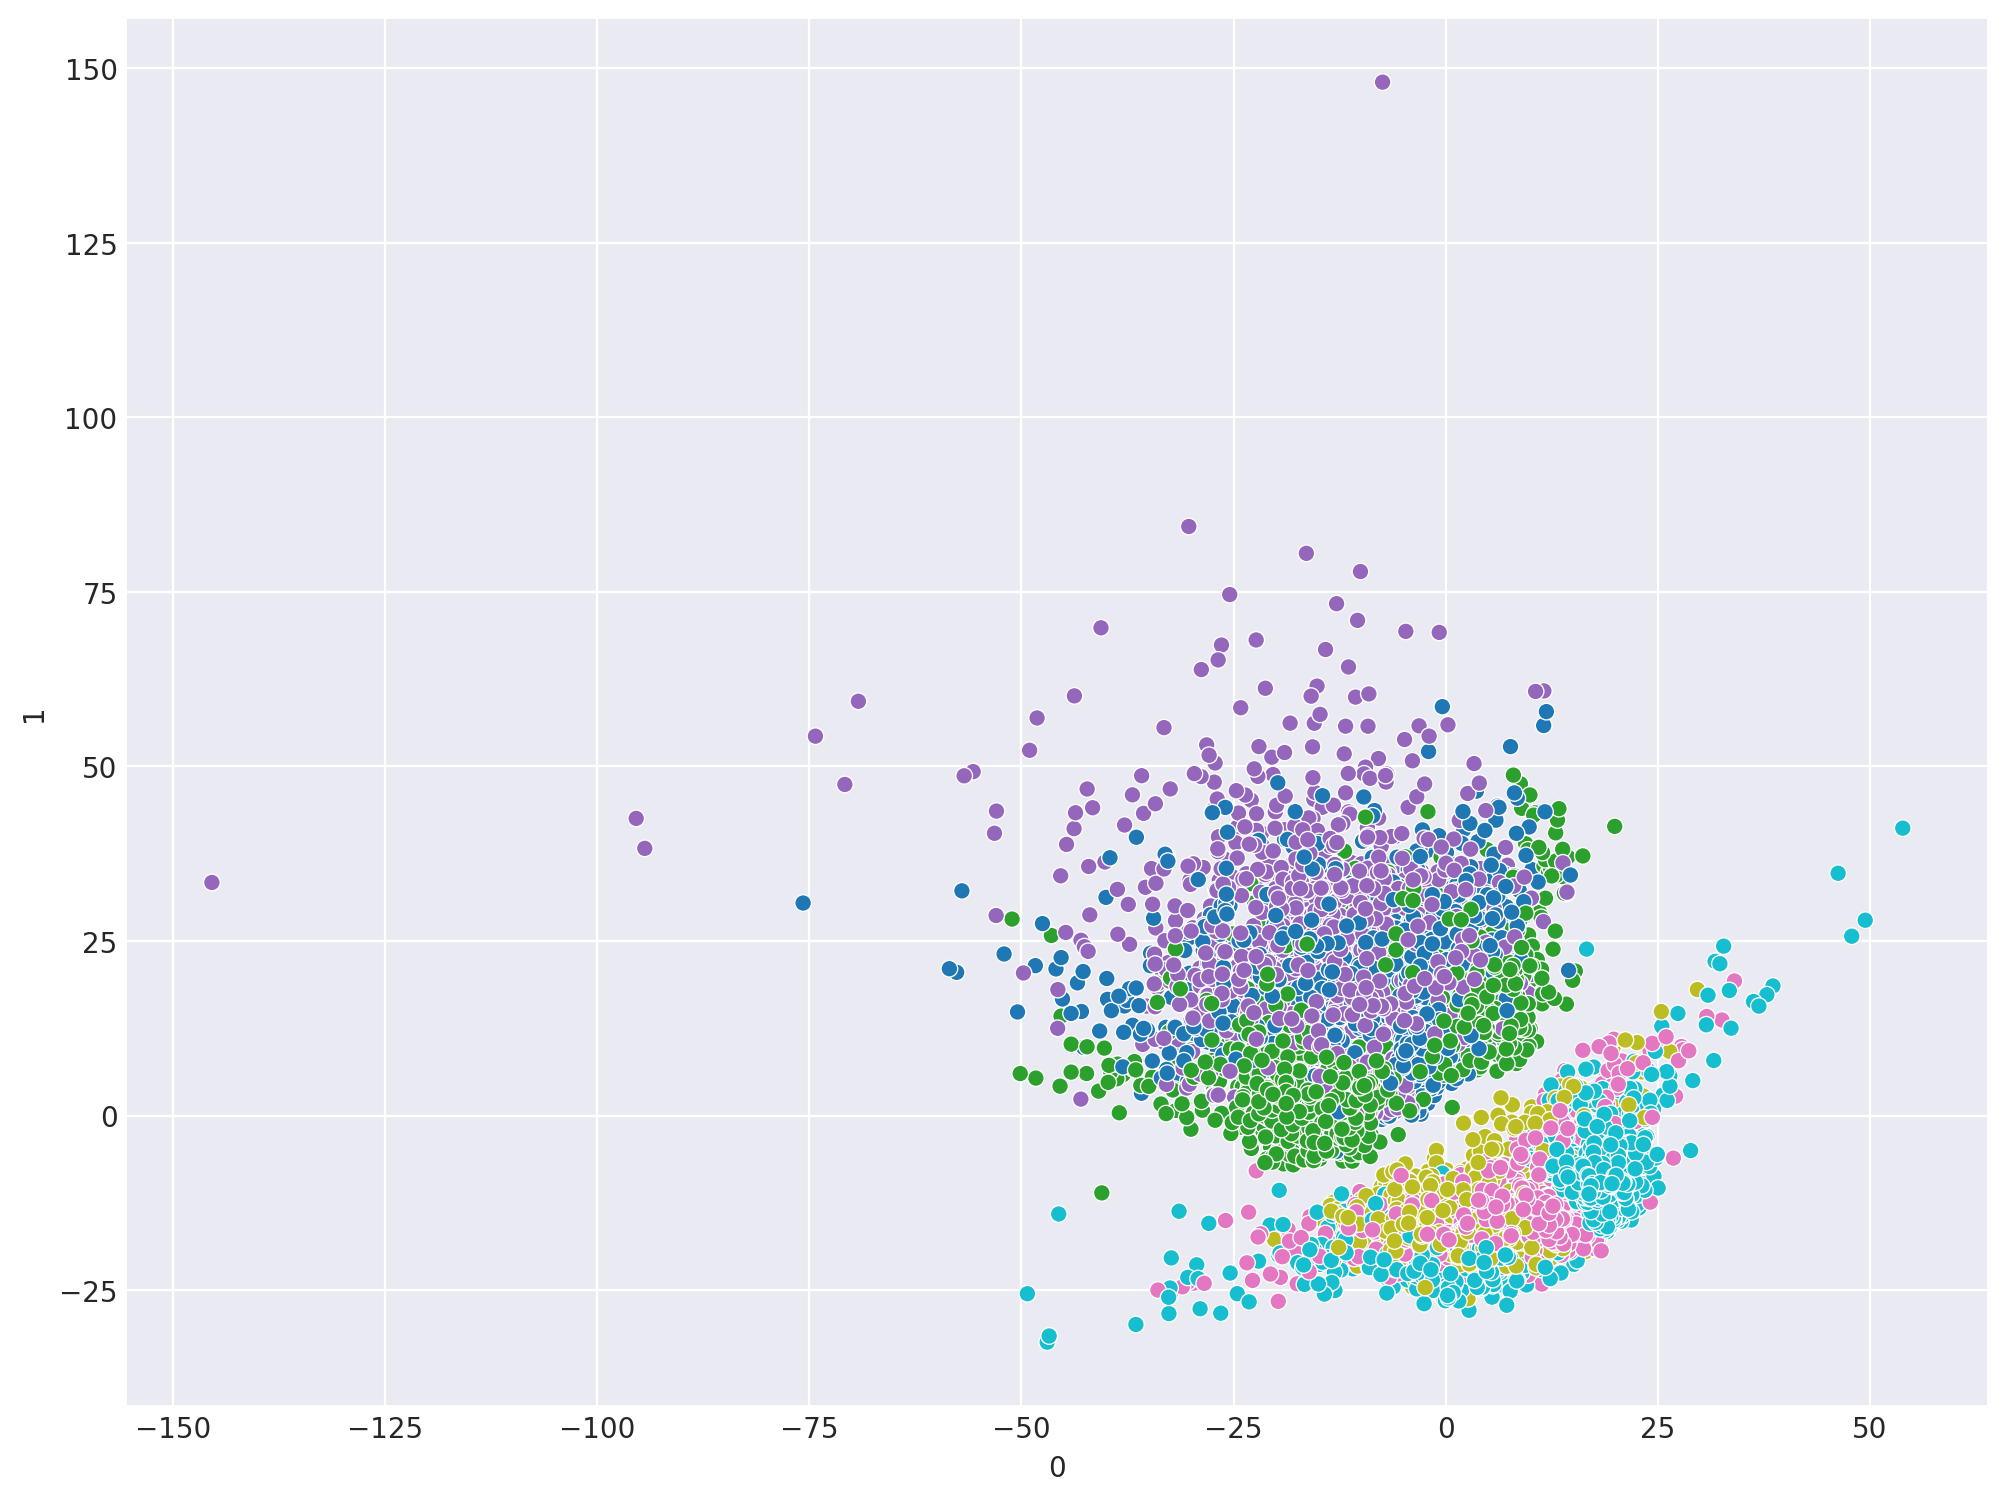

In [71]:
sns.scatterplot(data=mds_res, x=mds_res.iloc[:, 0], y=mds_res.iloc[:, 1], c=y, cmap=plt.cm.tab10)
plt.show()

## T-SNE

In [60]:
%%time

tsne = TSNE(n_components=2, random_state=RANDOM_STATE)

tsne_res = tsne.fit_transform(X_pca_t)
tsne_res = np.vstack((tsne_res.T, y.T)).T

CPU times: user 4min 30s, sys: 209 ms, total: 4min 30s
Wall time: 25.7 s


In [54]:
tsne_res = np.vstack((tsne_res.T, y.T)).T

In [56]:
tsne_df = pd.DataFrame(data = tsne_res,
     columns =("Dim_1", "Dim_2", "label"))

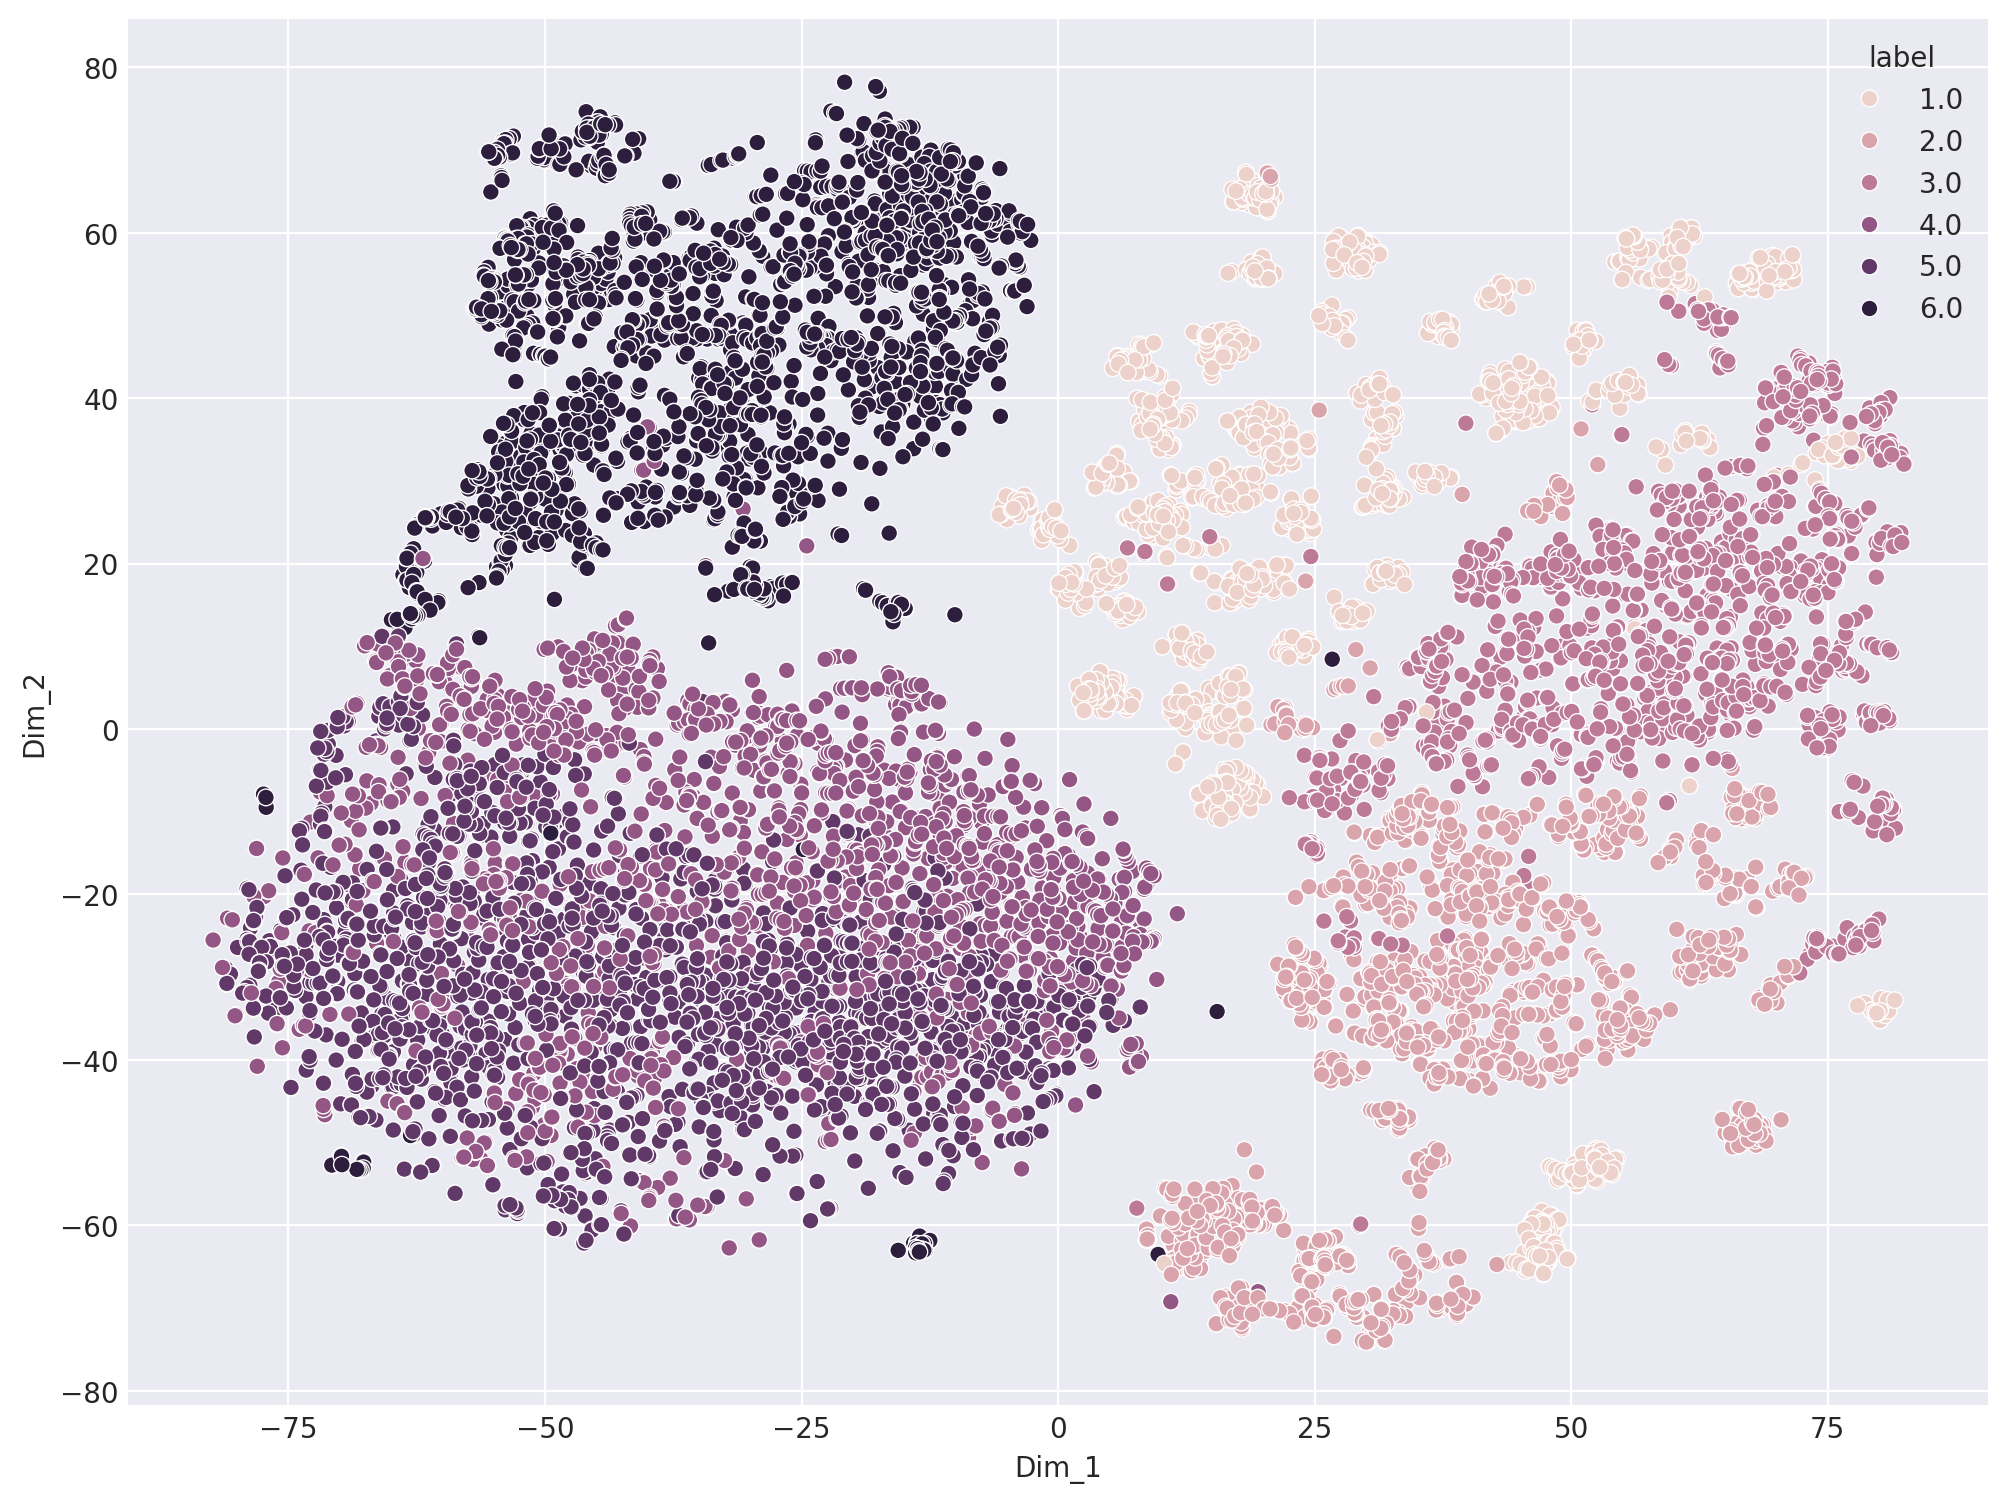

In [57]:
sns.scatterplot(data=tsne_df, x="Dim_1", y="Dim_2", hue="label")
plt.show()

## Isomap

In [74]:
%%time

isomap = Isomap(n_neighbors=6, n_components=2, n_jobs=-1)

isomap_res = isomap.fit_transform(X_pca_t)

CPU times: user 1min, sys: 444 ms, total: 1min 1s
Wall time: 31.6 s


In [75]:
isomap_res = pd.DataFrame(isomap_res)

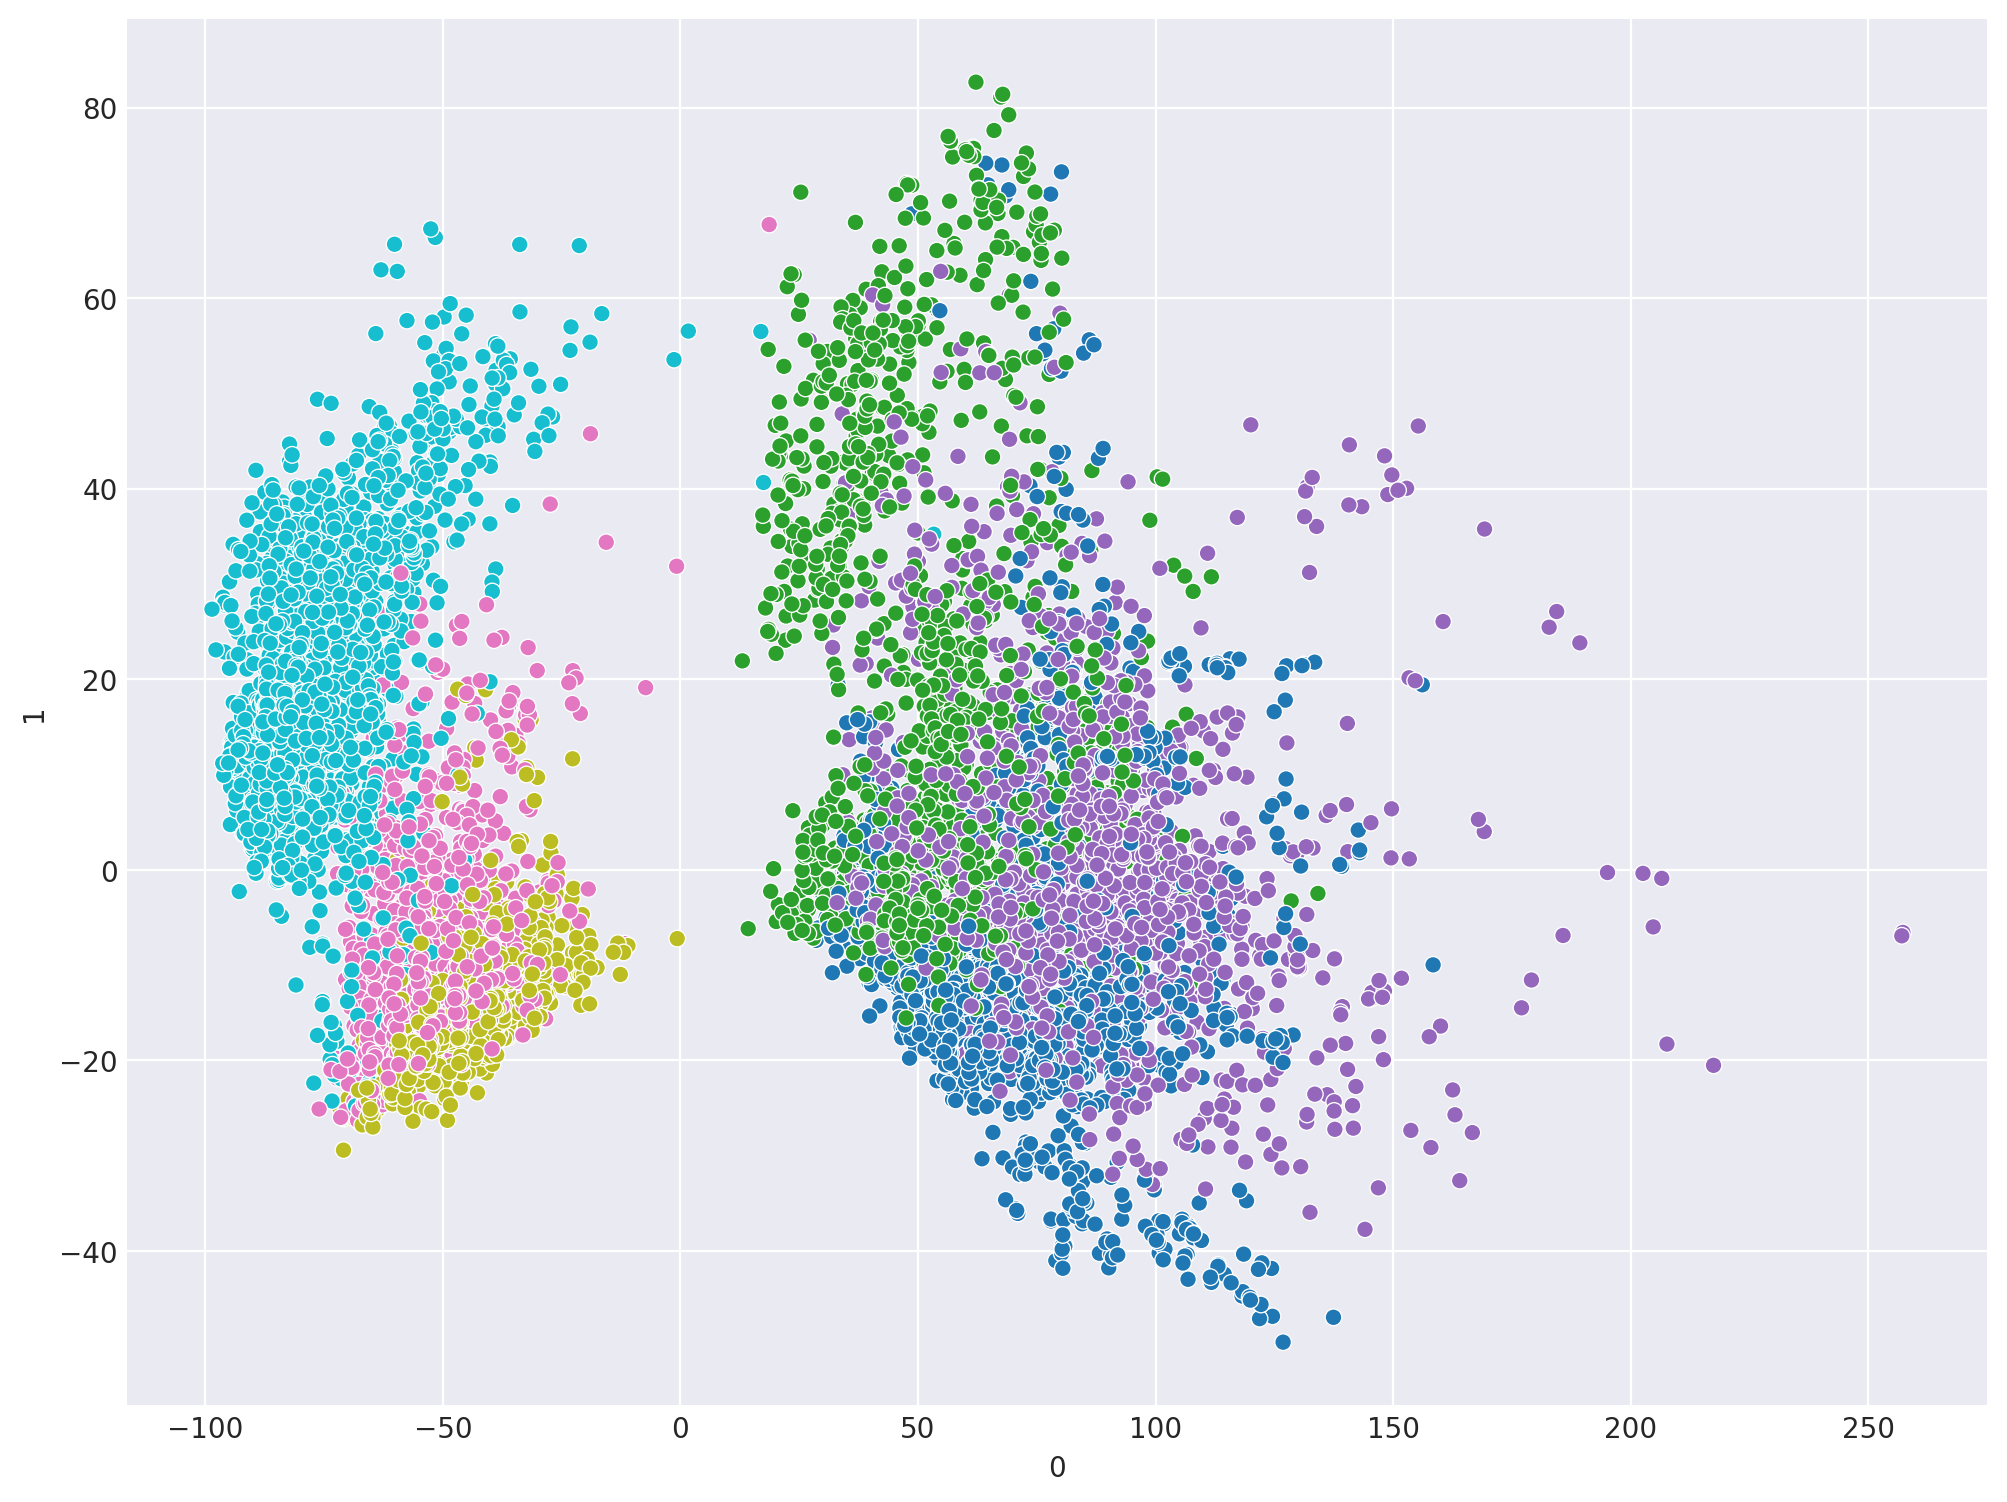

In [76]:
sns.scatterplot(data=isomap_res, x=isomap_res.iloc[:, 0], y=isomap_res.iloc[:, 1], c=y, cmap=plt.cm.tab10)
plt.show()